In [1]:
import sys
import os 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import re

plt.style.use('seaborn-v0_8-bright')

from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache

#If your computer is going low on RAM, commment the line above and use this instead:
# sys.path.append('../')
# from minisdk.core import EcephysProjectCache

c:\Users\Keshav Ganesh\anaconda3\envs\envallen\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data_dir = "../allendata"
#Again, we might want to use another folder if we do want to overwrite potential data we have
# data_dir = "../converted"

#From here on everything works with both AllenSDK and the MiniSDK!
manifest_path = os.path.join(data_dir, "manifest.json")
cache = EcephysProjectCache.from_warehouse(manifest=manifest_path)

In [3]:
sessions = cache.get_session_table() #Returns a Pandas dataframe
sessions.head() #Sneak peek of the table

,published_at,specimen_id,session_type,age_in_days,sex,full_genotype,unit_count,channel_count,probe_count,ecephys_structure_acronyms
id,,,,,,,,,,
715093703,2019-10-03T00:00:00Z,699733581,brain_observatory_1.1,118.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,884,2219,6,"[CA1, VISrl, nan, PO, LP, LGd, CA3, DG, VISl, ..."
719161530,2019-10-03T00:00:00Z,703279284,brain_observatory_1.1,122.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,755,2214,6,"[TH, Eth, APN, POL, LP, DG, CA1, VISpm, nan, N..."
721123822,2019-10-03T00:00:00Z,707296982,brain_observatory_1.1,125.0,M,Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,444,2229,6,"[MB, SCig, PPT, NOT, DG, CA1, VISam, nan, LP, ..."
732592105,2019-10-03T00:00:00Z,717038288,brain_observatory_1.1,100.0,M,wt/wt,824,1847,5,"[grey, VISpm, nan, VISp, VISl, VISal, VISrl]"
737581020,2019-10-03T00:00:00Z,718643567,brain_observatory_1.1,108.0,M,wt/wt,568,2218,6,"[grey, VISmma, nan, VISpm, VISp, VISl, VISrl]"


Number of sessions = 58

Columns: Index(['id', 'published_at', 'specimen_id', 'session_type', 'age_in_days',
       'sex', 'full_genotype', 'unit_count', 'channel_count', 'probe_count',
       'ecephys_structure_acronyms'],
      dtype='object')

Number of unique specimen: 58

Session types: 
brain_observatory_1.1      32
functional_connectivity    26
Name: session_type, dtype: int64



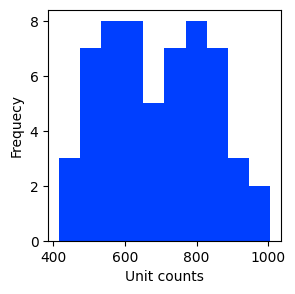

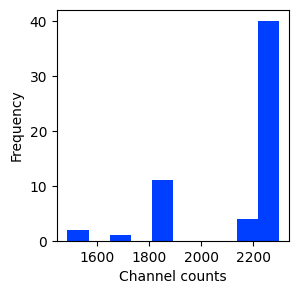

Probe count: 
6    44
5    12
4     2
Name: probe_count, dtype: int64



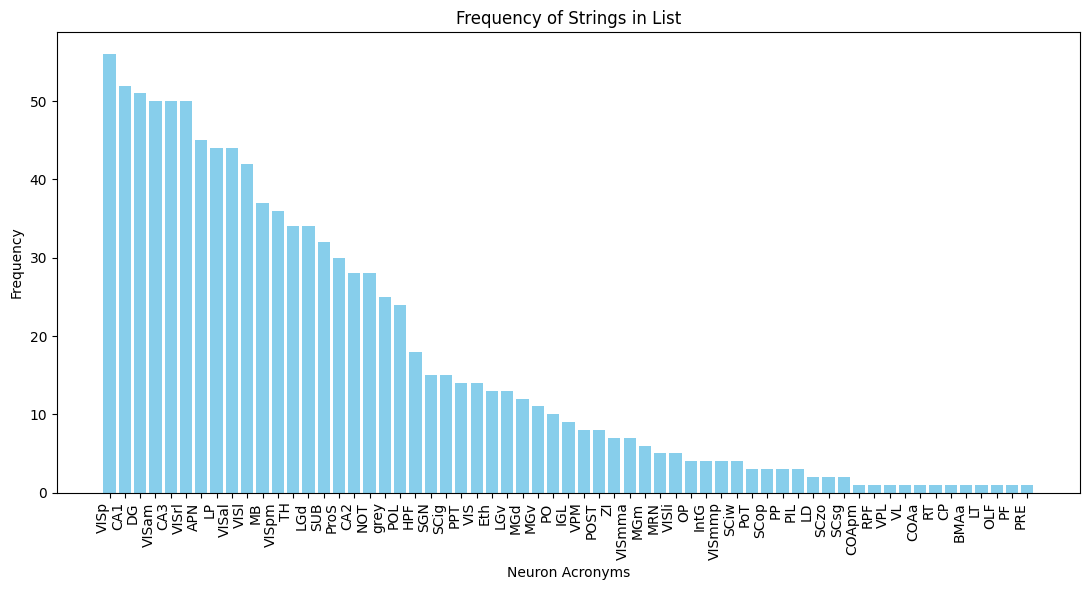

In [4]:
print(f'Number of sessions = {sessions.shape[0]}\n')

print(f'Columns: {sessions.columns}\n')

print(f'Number of unique specimen: {len(sessions.specimen_id.unique())}\n')

print(f'Session types: \n{sessions.session_type.value_counts()}\n')

# Distribution of unit counts
plt.figure(figsize=(3, 3))
plt.xlabel('Unit counts')
plt.ylabel('Frequecy')
plt.hist(sessions.unit_count)
plt.show()

# Distribution of channel counts
plt.figure(figsize=(3, 3))
plt.hist(sessions.channel_count)
plt.xlabel('Channel counts')
plt.ylabel('Frequency')
plt.show()

print(f'Probe count: \n{sessions.probe_count.value_counts()}\n')

# Structure acronyms 
pattern = r"'(.*?)'"
all_acronyms = []
for structure in sessions.ecephys_structure_acronyms:
    all_acronyms.extend(re.findall(pattern, structure))

acronym_counts = pd.DataFrame(all_acronyms).value_counts()
get_acronym_from_tuple = lambda t : t[0] 
labels = list(map(get_acronym_from_tuple, acronym_counts.index))
values = list(acronym_counts)

plt.figure(figsize=(11, 6))
plt.bar(labels, values, color='skyblue')
plt.xlabel('Neuron Acronyms')
plt.ylabel('Frequency')
plt.title('Frequency of Strings in List')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

## Stimulus Data Analysis



This section is dedicated to understanding the features of the stimuli. This will help us understand which feature works best for our experiment.

In [4]:
session_id = 798911424 
oursession = cache.get_session_data(session_id, timeout=3000)

c:\Users\Keshav Ganesh\anaconda3\envs\envallen\Lib\site-packages\hdmf\utils.py:668: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.1.3 because version 1.8.0 is already loaded.
  return func(args[0], **pargs)
c:\Users\Keshav Ganesh\anaconda3\envs\envallen\Lib\site-packages\hdmf\utils.py:668: UserWarning: Ignoring cached namespace 'core' version 2.2.2 because version 2.6.0-alpha is already loaded.
  return func(args[0], **pargs)


In [6]:
oursession.metadata["stimulus_names"]

['spontaneous',
 'gabors',
 'flashes',
 'drifting_gratings',
 'natural_movie_three',
 'natural_movie_one',
 'static_gratings',
 'natural_scenes',
 'drifting_gratings_contrast']

In [27]:
# Get the stimulus table
stimulus_table = oursession.stimulus_presentations
print(f'Stimulus table shape: {stimulus_table.shape}\n')
stimulus_table.head()

Stimulus table shape: (70931, 16)



,stimulus_block,start_time,stop_time,temporal_frequency,color,phase,y_position,spatial_frequency,orientation,stimulus_name,contrast,size,x_position,frame,duration,stimulus_condition_id
stimulus_presentation_id,,,,,,,,,,,,,,,,
0,null,24.875987,84.942787,null,null,null,null,null,null,spontaneous,null,null,null,null,60.066800,0
1,0.0,84.942787,85.176306,4.0,null,"[3644.93333333, 3644.93333333]",-10.0,0.08,90.0,gabors,0.8,"[20.0, 20.0]",20.0,null,0.233519,1
2,0.0,85.176306,85.426505,4.0,null,"[3644.93333333, 3644.93333333]",40.0,0.08,0.0,gabors,0.8,"[20.0, 20.0]",30.0,null,0.250199,2
3,0.0,85.426505,85.676704,4.0,null,"[3644.93333333, 3644.93333333]",-30.0,0.08,45.0,gabors,0.8,"[20.0, 20.0]",40.0,null,0.250199,3
4,0.0,85.676704,85.926904,4.0,null,"[3644.93333333, 3644.93333333]",-40.0,0.08,90.0,gabors,0.8,"[20.0, 20.0]",0.0,null,0.250199,4


In [12]:
#count the stimuli presentations by stimulus name

stimulus_table["stimulus_name"].value_counts()

natural_movie_three           36000
natural_movie_one             18000
static_gratings                6000
natural_scenes                 5950
gabors                         3645
drifting_gratings               630
drifting_gratings_contrast      540
flashes                         150
spontaneous                      16
Name: stimulus_name, dtype: int64

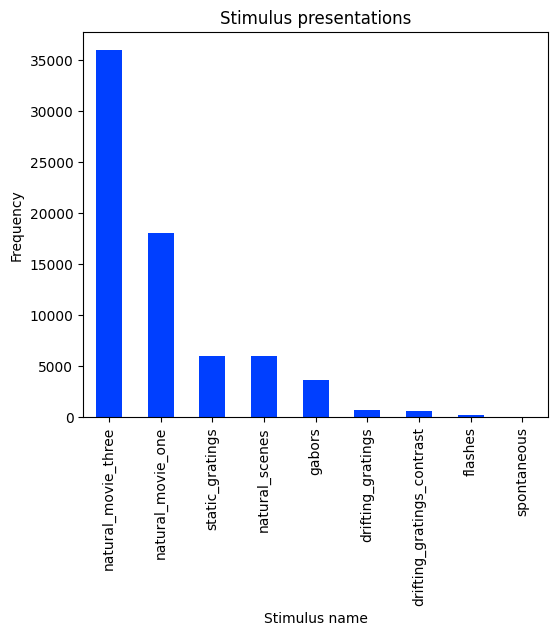

In [35]:
plt.figure(figsize=(6, 5))
stimulus_table["stimulus_name"].value_counts().plot(kind='bar')
plt.title('Stimulus presentations')
plt.xlabel('Stimulus name')
plt.ylabel('Frequency')
plt.show()


In [18]:
#getting mean and standard deviation of the duration of each stimulus

stimulus_list = oursession.metadata["stimulus_names"]
stimulus_durations = {}
for stimulus in stimulus_list:
    stimulus_durations[stimulus] = [stimulus_table[stimulus_table["stimulus_name"] == stimulus]["duration"].mean(), stimulus_table[stimulus_table["stimulus_name"] == stimulus]["duration"].std()]    

for stimulus in stimulus_durations:
    print(f"{stimulus}: {stimulus_durations[stimulus][0]} +- {stimulus_durations[stimulus][1]}")


spontaneous: 79.19221788251384 +- 108.83407951928265
gabors: 0.25020451789573755 +- 0.00027655386330397976
flashes: 0.25020805998790213 +- 4.980639237304457e-06
drifting_gratings: 2.0016736190476068 +- 1.8868997450796346e-05
natural_movie_three: 0.033361218055555544 +- 6.642123792417597e-07
natural_movie_one: 0.03336121722222217 +- 6.948506231825684e-07
static_gratings: 0.2502091333333333 +- 5.256326254067132e-06
natural_scenes: 0.2502091358801076 +- 5.116179387449517e-06
drifting_gratings_contrast: 0.5004491022023911 +- 0.0007176169017355527


We have the mean and standard deviations of the times for each stimulus. It's impractical to plot a chart due to the length of the spontaneuous stimulus duration being magnitudes greater than the other stimuli. Furthermore, the spontaneous stimulus, which only occured 16 times has the highest standard deviation time. Below, we exhaustively look at each type of stimulus and its features.

In [26]:
spontaneous_table = oursession.get_stimulus_table("spontaneous")
print(spontaneous_table.shape)
spontaneous_table.head()


(16, 5)


,start_time,stop_time,stimulus_name,duration,stimulus_condition_id
stimulus_presentation_id,,,,,
0,24.875987,84.942787,spontaneous,60.066800,0
3646,996.938254,1285.929787,spontaneous,288.991532,0
3797,1584.429283,1586.180717,spontaneous,1.751433,0
3998,2185.681814,2216.707717,spontaneous,31.025903,0
21999,2817.209647,2847.234747,spontaneous,30.025100,0


The spontaneous stimulus has no other features other than duration. Not much to go on. 

In [53]:
gabors_table = oursession.get_stimulus_table("gabors")
print(gabors_table.shape)
gabors_table.head()

(3645, 14)


,stimulus_block,start_time,stop_time,temporal_frequency,phase,y_position,spatial_frequency,orientation,stimulus_name,contrast,size,x_position,duration,stimulus_condition_id
stimulus_presentation_id,,,,,,,,,,,,,,
1,0.0,84.942787,85.176306,4.0,"[3644.93333333, 3644.93333333]",-10.0,0.08,90.0,gabors,0.8,"[20.0, 20.0]",20.0,0.233519,1
2,0.0,85.176306,85.426505,4.0,"[3644.93333333, 3644.93333333]",40.0,0.08,0.0,gabors,0.8,"[20.0, 20.0]",30.0,0.250199,2
3,0.0,85.426505,85.676704,4.0,"[3644.93333333, 3644.93333333]",-30.0,0.08,45.0,gabors,0.8,"[20.0, 20.0]",40.0,0.250199,3
4,0.0,85.676704,85.926904,4.0,"[3644.93333333, 3644.93333333]",-40.0,0.08,90.0,gabors,0.8,"[20.0, 20.0]",0.0,0.250199,4
5,0.0,85.926904,86.177122,4.0,"[3644.93333333, 3644.93333333]",10.0,0.08,45.0,gabors,0.8,"[20.0, 20.0]",-40.0,0.250218,5


In [72]:
flashes_table = oursession.get_stimulus_table("flashes")
print(flashes_table.shape)
flashes_table.head()

(150, 12)


,stimulus_block,start_time,stop_time,color,phase,spatial_frequency,orientation,stimulus_name,contrast,size,duration,stimulus_condition_id
stimulus_presentation_id,,,,,,,,,,,,
3647,1.0,1285.929787,1286.179996,-1.0,"[0.0, 0.0]","[0.0, 0.0]",0.0,flashes,0.8,"[300.0, 300.0]",0.250209,244
3648,1.0,1287.931477,1288.181681,-1.0,"[0.0, 0.0]","[0.0, 0.0]",0.0,flashes,0.8,"[300.0, 300.0]",0.250204,244
3649,1.0,1289.933157,1290.183361,-1.0,"[0.0, 0.0]","[0.0, 0.0]",0.0,flashes,0.8,"[300.0, 300.0]",0.250204,244
3650,1.0,1291.934847,1292.185046,-1.0,"[0.0, 0.0]","[0.0, 0.0]",0.0,flashes,0.8,"[300.0, 300.0]",0.250199,244
3651,1.0,1293.936507,1294.186708,1.0,"[0.0, 0.0]","[0.0, 0.0]",0.0,flashes,0.8,"[300.0, 300.0]",0.250202,245


In [30]:
drifting_gratings_table = oursession.get_stimulus_table("drifting_gratings")
print(drifting_gratings_table.shape)
drifting_gratings_table.head()

(630, 12)


,stimulus_block,start_time,stop_time,temporal_frequency,phase,spatial_frequency,orientation,stimulus_name,contrast,size,duration,stimulus_condition_id
stimulus_presentation_id,,,,,,,,,,,,
3798,2.0,1586.180717,1588.182387,15.0,"[5308.98333333, 5308.98333333]",0.04,0.0,drifting_gratings,0.8,"[250.0, 250.0]",2.00167,246
3799,2.0,1589.183244,1591.184924,2.0,"[5308.98333333, 5308.98333333]",0.04,180.0,drifting_gratings,0.8,"[250.0, 250.0]",2.00168,247
3800,2.0,1592.185737,1594.187427,1.0,"[5308.98333333, 5308.98333333]",0.04,45.0,drifting_gratings,0.8,"[250.0, 250.0]",2.00169,248
3801,2.0,1595.188274,1597.189944,8.0,"[5308.98333333, 5308.98333333]",0.04,90.0,drifting_gratings,0.8,"[250.0, 250.0]",2.00167,249
3802,2.0,1598.190777,1600.192447,2.0,"[5308.98333333, 5308.98333333]",0.04,270.0,drifting_gratings,0.8,"[250.0, 250.0]",2.00167,250


In [43]:
natural_movie_three_table = oursession.get_stimulus_table("natural_movie_three")
print(natural_movie_three_table.shape)
natural_movie_three_table.head()

(36000, 10)


,stimulus_block,start_time,stop_time,orientation,stimulus_name,contrast,size,frame,duration,stimulus_condition_id
stimulus_presentation_id,,,,,,,,,,
3999,3.0,2216.707717,2216.741078,0.0,natural_movie_three,1.0,"[1920.0, 1080.0]",0.0,0.033362,287
4000,3.0,2216.741078,2216.774440,0.0,natural_movie_three,1.0,"[1920.0, 1080.0]",1.0,0.033362,288
4001,3.0,2216.774440,2216.807802,0.0,natural_movie_three,1.0,"[1920.0, 1080.0]",2.0,0.033362,289
4002,3.0,2216.807802,2216.841164,0.0,natural_movie_three,1.0,"[1920.0, 1080.0]",3.0,0.033362,290
4003,3.0,2216.841164,2216.874526,0.0,natural_movie_three,1.0,"[1920.0, 1080.0]",4.0,0.033362,291


In [45]:
natural_movie_one_table = oursession.get_stimulus_table("natural_movie_one")
print(natural_movie_one_table.shape)
natural_movie_one_table.head()

(18000, 10)


,stimulus_block,start_time,stop_time,orientation,stimulus_name,contrast,size,frame,duration,stimulus_condition_id
stimulus_presentation_id,,,,,,,,,,
22000,4.0,2847.234747,2847.268107,0.0,natural_movie_one,1.0,"[1920.0, 1080.0]",0.0,0.033361,3887
22001,4.0,2847.268107,2847.301468,0.0,natural_movie_one,1.0,"[1920.0, 1080.0]",1.0,0.033361,3888
22002,4.0,2847.301468,2847.334829,0.0,natural_movie_one,1.0,"[1920.0, 1080.0]",2.0,0.033361,3889
22003,4.0,2847.334829,2847.368190,0.0,natural_movie_one,1.0,"[1920.0, 1080.0]",3.0,0.033361,3890
22004,4.0,2847.368190,2847.401551,0.0,natural_movie_one,1.0,"[1920.0, 1080.0]",4.0,0.033361,3891


The natural movie stimuli, both one and three have the same features and they also have the approximately the same durations. Furthermore, there is no rest period between stimuli (because it's a movie and each frame is played one after the other). In terms of features, there is not much else.

In [38]:
static_gratings_table = oursession.get_stimulus_table("static_gratings")
print(static_gratings_table.shape)
static_gratings_table.head()

(6000, 11)


,stimulus_block,start_time,stop_time,phase,spatial_frequency,orientation,stimulus_name,contrast,size,duration,stimulus_condition_id
stimulus_presentation_id,,,,,,,,,,,
49434,8.0,5399.367847,5399.618056,0.5,0.02,150.0,static_gratings,0.8,"[250.0, 250.0]",0.250209,4787
49435,8.0,5399.618056,5399.868265,0.5,0.16,0.0,static_gratings,0.8,"[250.0, 250.0]",0.250209,4788
49436,8.0,5399.868265,5400.118474,0.25,0.04,30.0,static_gratings,0.8,"[250.0, 250.0]",0.250209,4789
49437,8.0,5400.118474,5400.368684,0.75,0.04,60.0,static_gratings,0.8,"[250.0, 250.0]",0.250209,4790
49438,8.0,5400.368684,5400.618889,0.0,0.08,60.0,static_gratings,0.8,"[250.0, 250.0]",0.250206,4791


In [49]:
natural_scenes_table = oursession.get_stimulus_table("natural_scenes")
print(natural_scenes_table.shape)
natural_scenes_table.head()

(5950, 7)


,stimulus_block,start_time,stop_time,stimulus_name,frame,duration,stimulus_condition_id
stimulus_presentation_id,,,,,,,
51355,9.0,5909.794447,5910.044666,natural_scenes,13.0,0.250219,4908
51356,9.0,5910.044666,5910.294885,natural_scenes,38.0,0.250219,4909
51357,9.0,5910.294885,5910.545104,natural_scenes,30.0,0.250219,4910
51358,9.0,5910.545104,5910.795324,natural_scenes,35.0,0.250219,4911
51359,9.0,5910.795324,5911.045522,natural_scenes,112.0,0.250198,4912


The comments for the natural movie stimuli also apply to the above 2 tables as the start_time of the next stimulus is the end_time of the previous one. Natural scenes does not have many features, just the label id. On the other hand, the static gratings stimulus has a few features we can play around with. 

In [74]:
drifting_gratings_contrast_table = oursession.get_stimulus_table("drifting_gratings_contrast")
print(drifting_gratings_contrast_table.shape)
drifting_gratings_contrast_table.head()

(540, 12)


,stimulus_block,start_time,stop_time,temporal_frequency,phase,spatial_frequency,orientation,stimulus_name,contrast,size,duration,stimulus_condition_id
stimulus_presentation_id,,,,,,,,,,,,
70391,15.0,9182.529857,9183.030265,2.0,"[19258.96666667, 19258.96666667]",0.04,90.0,drifting_gratings_contrast,0.08,"[250.0, 250.0]",0.500408,5027
70392,15.0,9183.530674,9184.031095,2.0,"[19258.96666667, 19258.96666667]",0.04,0.0,drifting_gratings_contrast,0.08,"[250.0, 250.0]",0.500422,5028
70393,15.0,9184.531517,9185.031935,2.0,"[19258.96666667, 19258.96666667]",0.04,45.0,drifting_gratings_contrast,0.04,"[250.0, 250.0]",0.500418,5029
70394,15.0,9185.532354,9186.032765,2.0,"[19258.96666667, 19258.96666667]",0.04,45.0,drifting_gratings_contrast,0.01,"[250.0, 250.0]",0.500412,5030
70395,15.0,9186.533177,9187.033600,2.0,"[19258.96666667, 19258.96666667]",0.04,90.0,drifting_gratings_contrast,0.04,"[250.0, 250.0]",0.500423,5031


### Summary of the features of the stimuli

I have determined two things for each stimulus. Firstly, whether there exists a gap between the stimuli or if it's continuous. Secondly, the features of the stimuli which have varying parameters, eg orientation, temporal frequency etc.

1) Spontaneous  
Gaps: yes, but it's spontaneous so it doesn't make sense to consider it.  
Features: None

2) Gabors  
Gaps: no  
Features: Orientation, y_position, x_position  

3) Flashes  
Gaps: yes (approx 1.75 seconds)  
Features: Color  

4) Drifting gratings  
Gaps: no  
Features: temporal frequency, orientation  

5) natural_movie_three & natural_movie_one  
Gaps: no  
Features: None  

6) Static gratings  
Gaps: No  
Features: Orientation, Spatial Frequency  

7) Natural scenes  
Gaps: No  
Features: Label id/frame  

8) Drifting gratings contrast   
Gaps: Yes (approx 0.5 seconds)  
Features: Orientation  